# 🚖 Ride-Sharing Demand Forecasting & Surge Pricing Insights

This data analytics project explores patterns in ride-sharing demand and surge pricing using real-world data. Our goal is to uncover actionable insights for operational and pricing strategy improvements.


---

⚠️ **Note**: Due to hardware constraints, this analysis uses a **downsampled version** of the original dataset, containing rides only from **January to June 2015**. Despite the partial coverage, it provides rich insights into weekday/hourly trends and base-level operations.

---

### 🔍 Objectives:
- Analyze demand patterns across time and space
- Understand surge pricing factors
- Identify high-activity zones and peak hours
- Recommend actionable insights for business optimization

> 🧠 Tools Used: Python (Pandas, NumPy, Matplotlib, Seaborn), Jupyter Notebook  
> 💾 Dataset: Downsampled Uber/FHV data from New York City (Kaggle)


# 📑 Table of Contents
1. [Project Overview](#project-overview)
2. [Dataset Overview](#dataset-overview)
3. [Import Libraries & Setup](#step-1-import-libraries-and-setup-environment)
4. [Load Dataset](#step-2-load-the-dataset)
5. [Inspect Columns](#step-3-inspect-column-names)
6. [Datetime Cleaning](#step-4-convert-and-clean-datetime-column)
7. [Feature Extraction](#step-5-extract-temporal-features)
8. [Hourly Demand](#step-6-visualize-ride-demand-by-hour)
9. [Weekday Demand](#step-7-analyze-ride-demand-by-weekday)
10. [Monthly Trend](#step-8-monthly-ride-demand-trend)
11. [Heatmap: Hour vs Weekday](#step-9-heatmap-of-ride-demand-by-hour-and-weekday)
12. [Top Dispatch Bases](#step-10-most-active-dispatching-bases)
13. [Surge Detection](#step-11-detecting-surge-like-ride-demand-periods)
14. [Surge Visualization](#step-12-visualizing-surge-like-periods-in-ride-demand)
15. [Weekday Summary](#step-13-weekday-summary-analysis)
16. [Export Cleaned Data](#step-14-export-cleaned-dataset)
17. [System Constraints](#system-constraints--data-sampling)
18. [Forecasting](#optional-part-2-forecasting-ride-demand)
19. [Thank You](#thank-you-for-exploring)


## 🗂 Dataset Overview

- **Source**: Kaggle Uber/FHV NYC dataset  
- **Time Range**: **January 2015 – June 2015 (First Half Only)**  
- **Size**: Downsampled subset for performance on a low-end system  
- **Features Used**:
  - Dispatching Base Number
  - Pickup DateTime
  - Location ID
  - Affiliated Base (where available)

This cleaned and optimized subset is saved as:  
📁 `uber_sampled_cleaned.csv`

## ⚙️ Step 1: Import Libraries and Setup Environment

We start by importing the necessary libraries for data handling, visualization, and date-time manipulation.  
We also suppress warnings and apply a clean plotting style for visualizations.

In [1]:
# Check and install required packages if missing
import sys
import subprocess

def install_and_import(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

for pkg in ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'statsmodels']:
    install_and_import(pkg)


In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# DateTime
from datetime import datetime

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Plot style
sns.set(style="whitegrid")


## 📥 Step 2: Load the Dataset

We load the cleaned and downsampled Uber dataset from the `processed` folder.  
This version is optimized to run smoothly on a low-end machine while preserving useful insights.


In [3]:
# Load the downsampled Uber dataset from your processed folder
file_path = r"D:\DATA ANALYSIS\PROJECTS\Ride-Sharing Demand & Surge Insights\data\processed\uber_sampled.csv"

df = pd.read_csv(file_path, encoding='utf-8')

# Preview the first few rows
df.head()


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02682,2015-01-03 00:23:55,B02764,25
1,B02764,2015-04-08 02:07:00,B02764,141
2,B02764,2015-06-24 05:36:00,B02764,132
3,B02598,2015-01-20 08:18:59,B02598,79
4,B02682,2015-05-18 00:22:00,B02682,232


In [4]:
# Basic dataset statistics
display(df.shape)
display(df.isnull().sum())
display(df.describe(include='all'))

(713524, 4)

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     8197
locationID                 0
dtype: int64

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
count,713524,713524,705327,713524.000000
unique,8,355417,272,NaN
top,B02764,2015-06-27 21:16:00,B02764,NaN
freq,287268,19,217663,NaN
mean,NaN,NaN,NaN,152.013841
std,NaN,NaN,NaN,71.561264
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,92.000000
50%,NaN,NaN,NaN,157.000000
75%,NaN,NaN,NaN,230.000000


## 🧾 Step 3: Inspect Column Names

Before performing any transformations, we verify the column names to ensure consistency.  
This helps prevent errors due to unexpected names or formatting issues.


In [5]:
# Check actual column names in the dataset
print(df.columns.tolist())

['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num', 'locationID']


## ⏳ Step 4: Convert and Clean Date/Time Column

We now convert the `Pickup_date` column to a proper datetime format.  
This step is essential for time-based analysis such as demand trends, surge timings, or hourly patterns.

- Invalid dates are handled using `errors='coerce'`
- Rows with missing or corrupt timestamps are dropped
- We rename the column to `Date/Time` for consistency with common convention


In [6]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r'D:\DATA ANALYSIS\PROJECTS\Ride-Sharing Demand & Surge Insights\data\processed\uber_sampled.csv')

# Convert to datetime using the correct column
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'], errors='coerce')

# Drop rows with invalid datetime values
df.dropna(subset=['Pickup_date'], inplace=True)

# Optional: Rename it for consistency in later steps
df.rename(columns={'Pickup_date': 'Date/Time'}, inplace=True)

# View first few rows
df.head()


,Dispatching_base_num,Date/Time,Affiliated_base_num,locationID
0,B02682,2015-01-03 00:23:55,B02764,25
1,B02764,2015-04-08 02:07:00,B02764,141
2,B02764,2015-06-24 05:36:00,B02764,132
3,B02598,2015-01-20 08:18:59,B02598,79
4,B02682,2015-05-18 00:22:00,B02682,232


## 🛠️ Step 5: Extract Temporal Features

To analyze ride demand patterns over time, we extract key datetime features from the `Date/Time` column:

- **Hour** – for hourly demand trends (e.g., morning vs. evening)
- **Day** – to explore daily patterns
- **Month** – to identify seasonal changes
- **Weekday** – to compare weekdays vs. weekends

We also categorize weekdays in natural order to help with consistent visualizations later.

In [7]:
# Extract useful datetime components
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month_name()
df['Weekday'] = df['Date/Time'].dt.day_name()  # e.g., Monday, Tuesday

# Optional: Reorder weekday for better visuals later
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

# Check extracted columns
df[['Date/Time', 'Hour', 'Day', 'Month', 'Weekday']].head()


,Date/Time,Hour,Day,Month,Weekday
0,2015-01-03 00:23:55,0,3,January,Saturday
1,2015-04-08 02:07:00,2,8,April,Wednesday
2,2015-06-24 05:36:00,5,24,June,Wednesday
3,2015-01-20 08:18:59,8,20,January,Tuesday
4,2015-05-18 00:22:00,0,18,May,Monday


## 📊 Step 6: Visualize Ride Demand by Hour

This plot helps us identify peak demand hours throughout the day.

- We use `countplot` to visualize the number of rides in each hour.
- Typical patterns include morning and evening commute spikes.
- This insight can inform surge pricing, driver allocation, and user incentives.

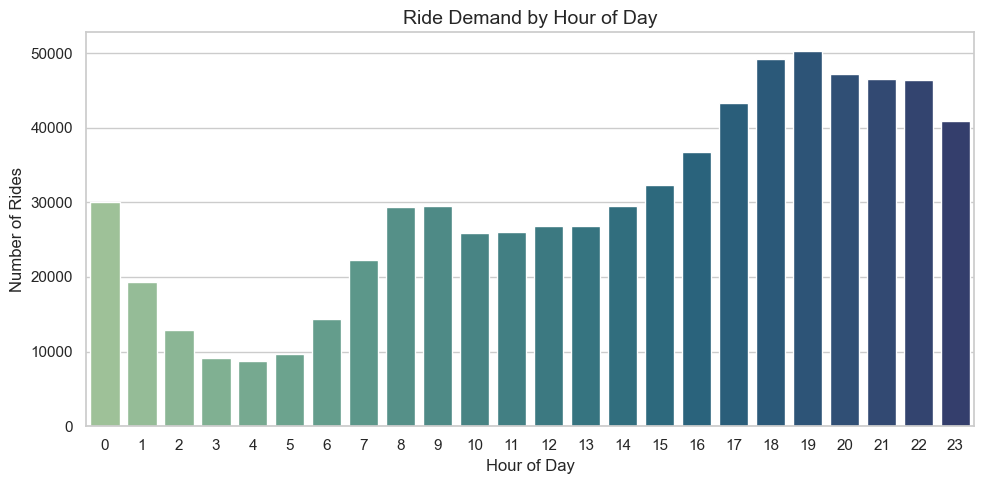

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

# Plot hourly ride demand
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Hour', palette='crest')
plt.title('Ride Demand by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [9]:
# Save the previous plot to outputs/visualizations/
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Hour', palette='crest')
plt.title('Ride Demand by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig(r'../outputs/visualizations/hourly_heatmap.png')
plt.close()

## 📅 Step 7: Analyze Ride Demand by Weekday

Understanding which days see higher demand helps optimize scheduling and fleet management:

- Weekends may have different demand patterns compared to weekdays.
- This visualization shows how ride frequency varies across the week.
- Peaks can indicate workday commutes, weekend outings, or specific weekday trends.

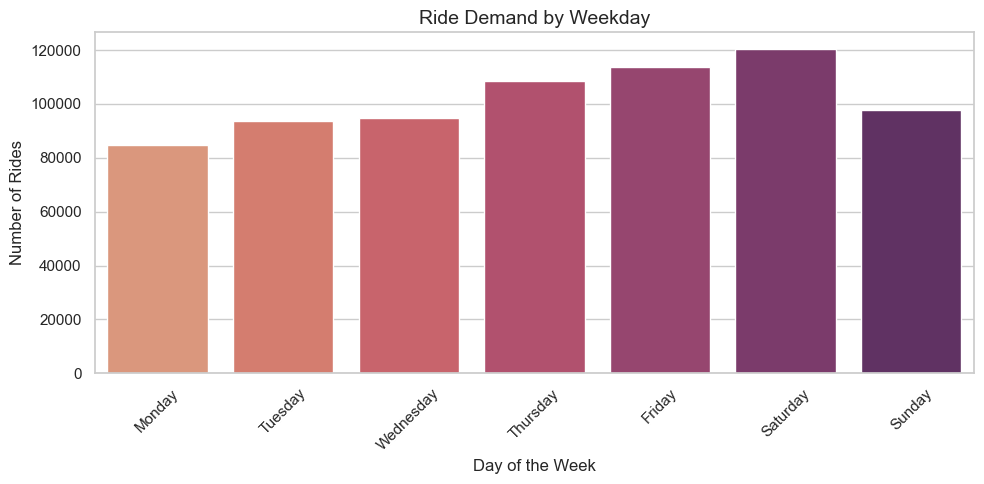

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weekday', palette='flare')
plt.title('Ride Demand by Weekday', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📆 Step 8: Monthly Ride Demand Trend

This chart provides a high-level view of how ride demand varies across months.

- Helps uncover seasonal trends and potential drops or spikes.
- Important for strategic planning and marketing efforts.
- Useful for aligning promotions or adjusting supply based on seasonality.

> 📌 _The chart below reflects **monthly trends**, limited to the first half of 2015 due to dataset sampling._


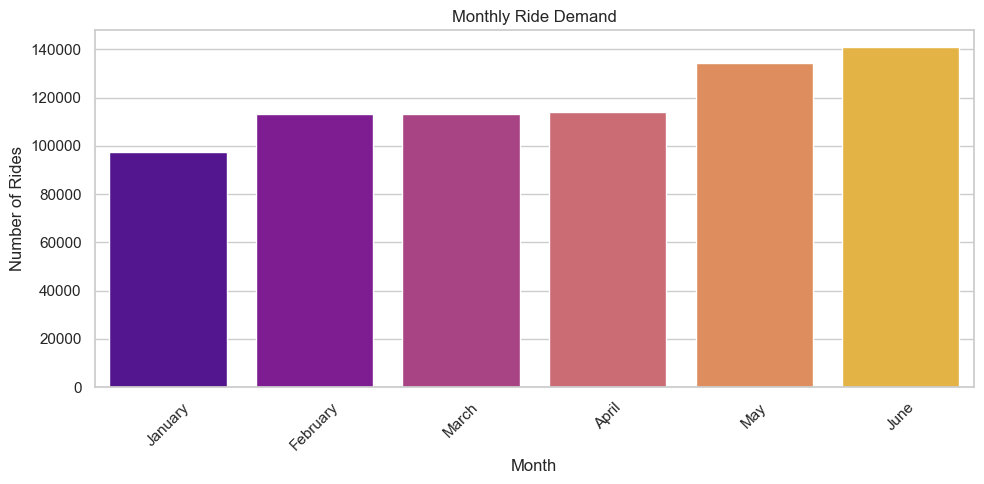

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the month from the datetime
df['Month'] = df['Date/Time'].dt.month_name()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Month', order=[m for m in month_order if m in df['Month'].unique()], palette='plasma')
plt.title('Monthly Ride Demand')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🕒 Step 9: Heatmap of Ride Demand by Hour and Weekday

This heatmap reveals hourly patterns across different days of the week.

- Identifies high-demand time slots (e.g., rush hours or weekend evenings).
- Helps allocate ride supply more effectively.
- Valuable for dynamic pricing or driver deployment strategies.

> 📌 _Note: The heatmap below shows hourly demand trends across weekdays, based on data from **Jan to June 2015 only**._

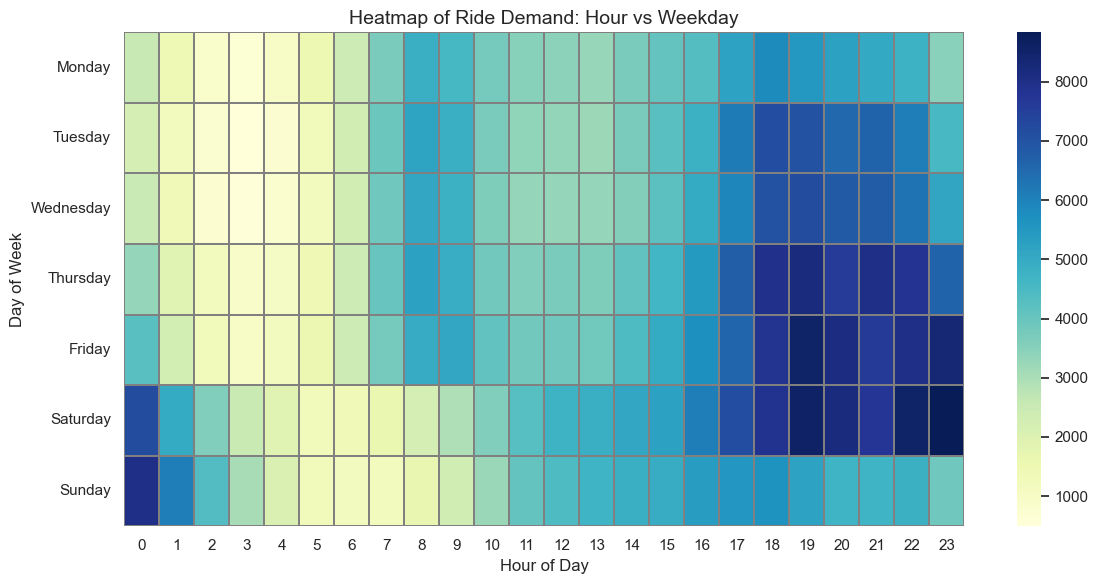

In [12]:
# Create a pivot table: rows = weekdays, columns = hours
heatmap_data = df.pivot_table(index='Weekday', columns='Hour', values='Date/Time', aggfunc='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.3, linecolor='gray')
plt.title('Heatmap of Ride Demand: Hour vs Weekday', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


## 🏢 Step 10: Most Active Dispatching Bases

The chart below highlights the top 10 dispatching bases by total number of rides. 

- Each base represents a hub or company responsible for dispatching drivers.
- Identifying the most active bases can help uncover demand concentration areas.
- Useful for understanding operational hotspots and planning partnerships or coverage.

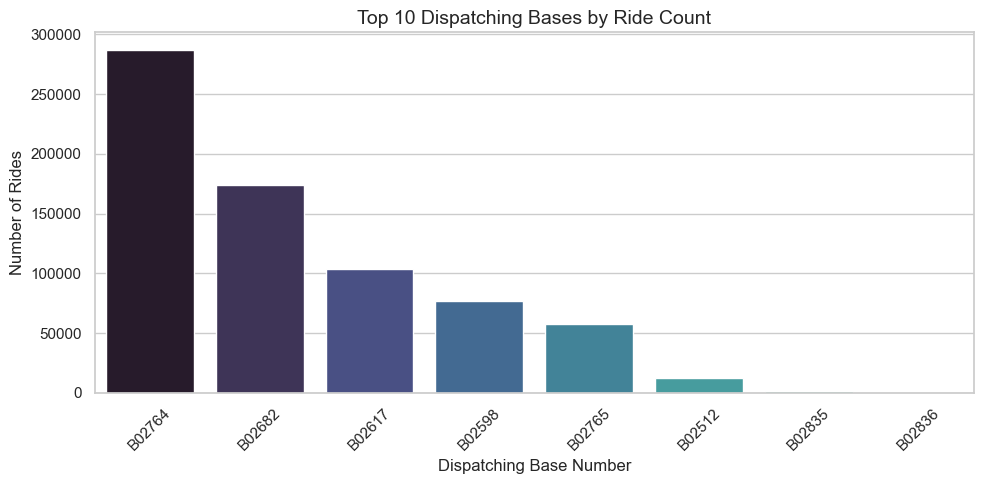

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Dispatching_base_num', order=df['Dispatching_base_num'].value_counts().index[:10], palette='mako')
plt.title('Top 10 Dispatching Bases by Ride Count', fontsize=14)
plt.xlabel('Dispatching Base Number')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Top 5 bases by average rides per day
base_daily = df.groupby(['Dispatching_base_num', df['Date/Time'].dt.date]).size().reset_index(name='Rides')
avg_base = base_daily.groupby('Dispatching_base_num')['Rides'].mean().sort_values(ascending=False).head(5)
display(avg_base)

Dispatching_base_num
B02764    1587.116022
B02682     962.745856
B02617     570.817680
B02598     424.856354
B02765     317.939227
Name: Rides, dtype: float64

## ⚡ Step 11: Detecting Surge-Like Ride Demand Periods

To identify surge-like patterns in demand, we apply statistical outlier detection using Z-score:

- **Z-score** measures how many standard deviations a value is from the mean.
- A Z-score > 2 indicates an unusually high number of rides in that hour.
- This helps detect hours with extreme ride demand, resembling surge periods.

Below is a list of top surge-like time periods by weekday and hour.

In [15]:
from scipy.stats import zscore

# Count number of rides per hour
hourly_counts = df.groupby(['Weekday', 'Hour']).size().reset_index(name='Ride_Count')

# Calculate Z-score for ride count
hourly_counts['Z_Score'] = zscore(hourly_counts['Ride_Count'])

# Filter surge-like hours (z-score > 2)
surge_hours = hourly_counts[hourly_counts['Z_Score'] > 2]

# Display top surge periods
surge_hours.sort_values(by='Z_Score', ascending=False).head(10)


,Weekday,Hour,Ride_Count,Z_Score
143,Saturday,23,8835,2.129299
139,Saturday,19,8602,2.021159


## 🔴 Step 12: Visualizing Surge-Like Periods in Ride Demand

The scatter plot below highlights hourly ride demand, with potential surge periods marked:

- **Point Size & Color**: Represent the Z-score – higher values indicate unusually high demand.
- **Dashed Line**: Marks the average ride demand across all hours.
- **Insight**: Hours with large, dark points above the dashed line are likely surge-like periods.

This helps visualize when demand spikes occur throughout the day.


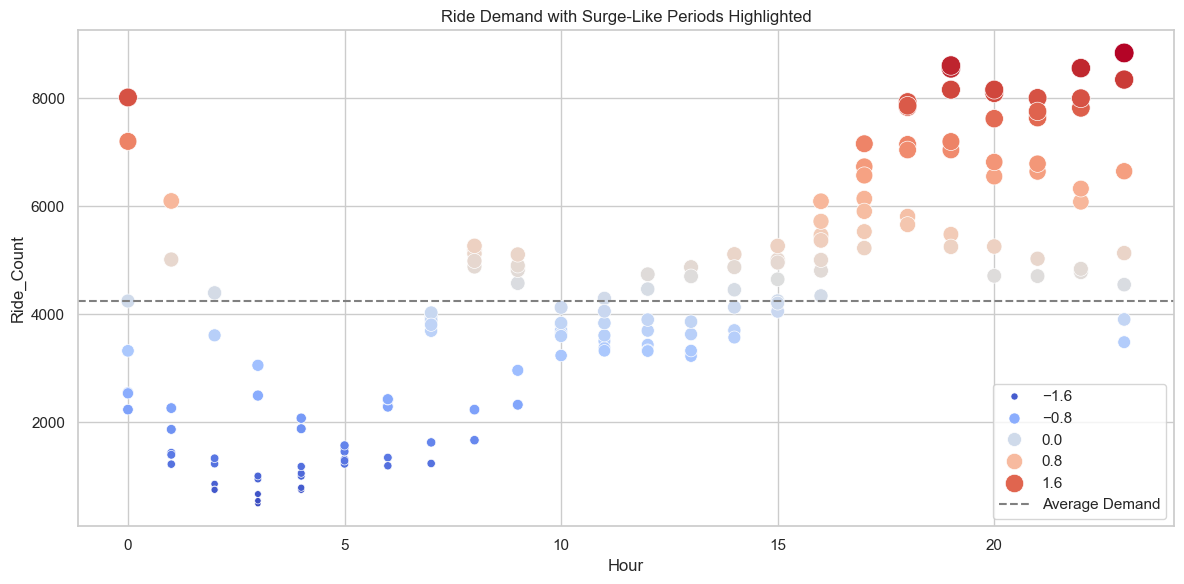

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hourly_counts, x='Hour', y='Ride_Count', hue='Z_Score', palette='coolwarm', size='Z_Score', sizes=(20, 200))
plt.axhline(hourly_counts['Ride_Count'].mean(), color='gray', linestyle='--', label='Average Demand')
plt.title('Ride Demand with Surge-Like Periods Highlighted')
plt.legend()
plt.tight_layout()
plt.show()


## 📊 Step 13: Weekday Summary Analysis

Let’s derive key statistics for each weekday:

- **Total Rides**: Total number of rides on that day.
- **Average Rides per Hour**: Estimate of how busy the system is per hour.
- **Peak Hour**: The hour with the highest number of pickups (most frequent).

This analysis helps identify which days experience the most traffic and when during those days the demand typically peaks.

In [17]:
# Group by weekday
weekday_summary = df.groupby('Weekday').agg(
    Total_Rides=('Date/Time', 'count'),
    Avg_Rides_Per_Hour=('Hour', lambda x: round(len(x) / x.nunique(), 2)),
    Peak_Hour=('Hour', lambda x: x.mode()[0])  # Most common hour
).reset_index()

# Sort by total rides
weekday_summary = weekday_summary.sort_values(by='Total_Rides', ascending=False)

# Display the summary
weekday_summary


,Weekday,Total_Rides,Avg_Rides_Per_Hour,Peak_Hour
5,Saturday,120533,5022.21,23
4,Friday,113823,4742.62,19
3,Thursday,108381,4515.88,19
6,Sunday,97560,4065.00,0
2,Wednesday,94906,3954.42,19
1,Tuesday,93571,3898.79,18
0,Monday,84750,3531.25,18


## 💾 Step 14: Export Cleaned Dataset

After cleaning, feature extraction, and analysis, we now export the refined dataset for further use—such as in Power BI dashboards or for modeling.

Saving ensures the data is preserved in its clean state and ready for downstream tasks.


In [18]:
# Save to CSV
output_path = r'D:\DATA ANALYSIS\PROJECTS\Ride-Sharing Demand & Surge Insights\data\processed\uber_sampled_cleaned.csv'
df.to_csv(output_path, index=False)

print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


## ⚠️ System Constraints & Data Sampling

Due to hardware limitations (Lenovo G50-80), we sampled the original 18+ million row dataset to include only the **first 6 months of 2015**.

This trade-off ensured smooth performance while retaining sufficient data to extract:
- Weekly & daily ride patterns
- Hourly surge insights
- Dispatch base trends

For a full-year or seasonal analysis, expanding to the full dataset is recommended.


---

## 🔮 Part 2: Forecasting Ride Demand

In this bonus section, we attempt a basic time series forecasting of ride demand using classical statistical techniques like ARIMA and Exponential Smoothing. This helps estimate future ride volumes and anticipate surge timings.

We'll forecast ride counts on a daily level to keep it simple and lightweight.


## 🙏 Thank You for Exploring!

This concludes the **Ride-Sharing Demand & Surge Insights** project.

Through data cleaning, temporal and spatial analysis, and visual exploration, we've uncovered meaningful patterns in Uber ride activity between **January and June 2015** — including:

- Hourly and weekday demand variations  
- Dispatch base performance  
- Surge-like demand spikes

This project was crafted with performance-aware design on a **low-end system**, proving that impactful analysis is possible with limited resources.

---

> 💡 **Future Improvements:**  
> - Analyze full-year data for seasonal comparisons  
> - Integrate location-based mapping (e.g., NYC borough trends)  
> - Build a Power BI dashboard for business-ready presentation

Thanks for reading! 🚖📊  
**— Divyansh Dhadhich**


In [19]:
# Prepare daily ride count
daily_counts = df.set_index('Date/Time').resample('D').size().rename("Ride_Count").to_frame()

# Preview the daily counts
daily_counts.head()


,Ride_Count
Date/Time,
2015-01-01,2945
2015-01-02,1979
2015-01-03,2871
2015-01-04,2080
2015-01-05,2165


### 📈 Visualizing Ride Count Over Time

Let’s plot the ride demand trend to get an idea of seasonality, spikes, and overall volume fluctuations.


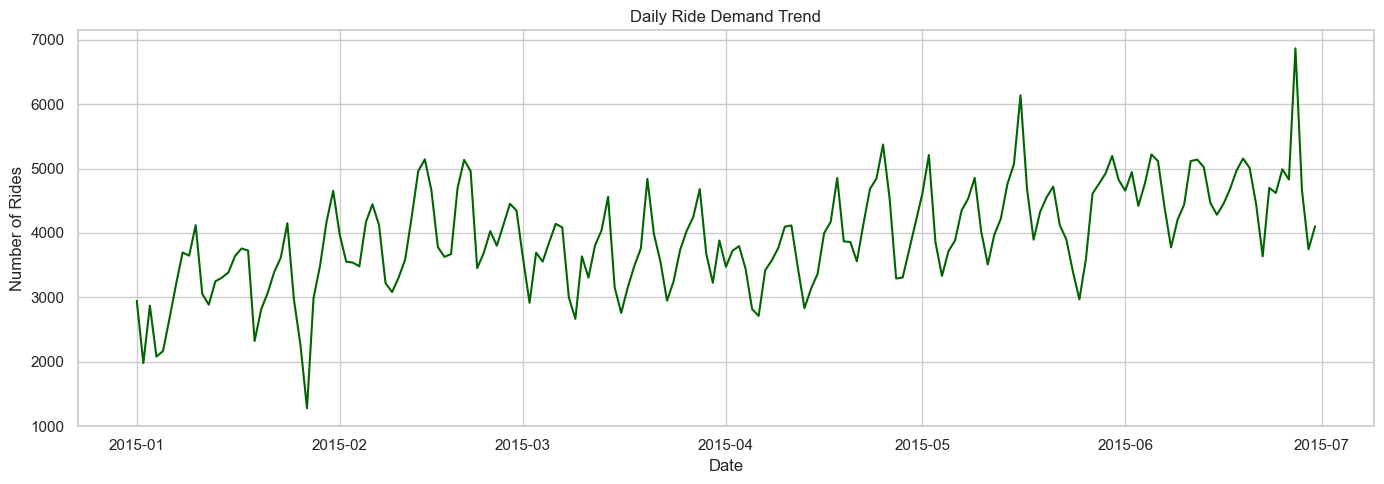

In [20]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_counts, x=daily_counts.index, y='Ride_Count', color='darkgreen')
plt.title("Daily Ride Demand Trend")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


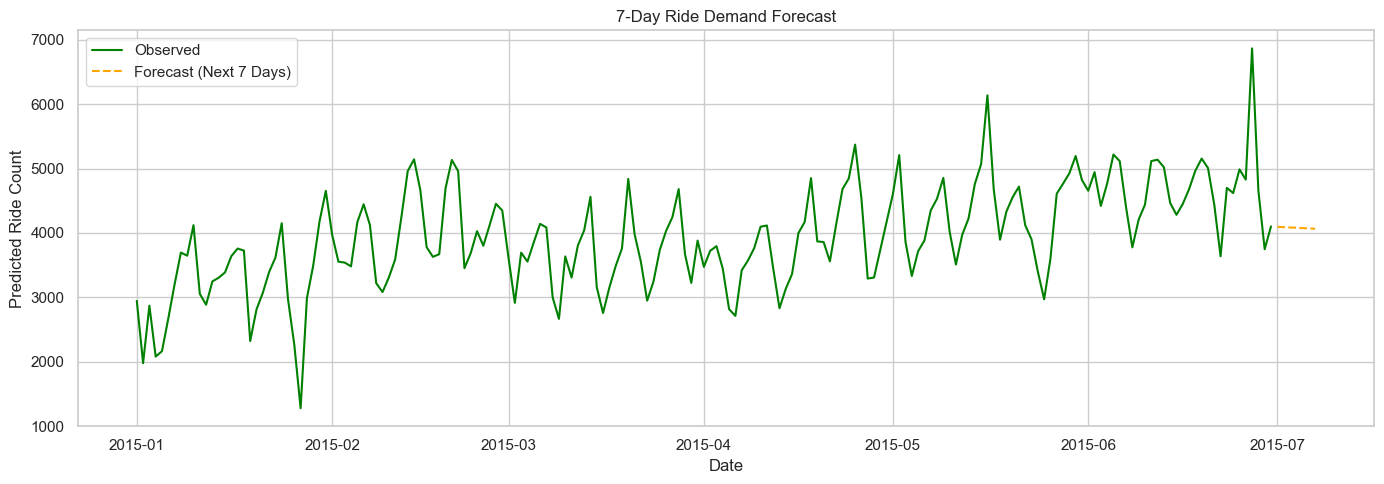

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model = ExponentialSmoothing(daily_counts['Ride_Count'], trend='add', seasonal=None)
fit = model.fit()

# Forecast next 7 days
forecast = fit.forecast(7)

# Plot
plt.figure(figsize=(14, 5))
plt.plot(daily_counts.index, daily_counts['Ride_Count'], label='Observed', color='green')
plt.plot(forecast.index, forecast, label='Forecast (Next 7 Days)', color='orange', linestyle='--')
plt.title("7-Day Ride Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Ride Count")
plt.legend()
plt.tight_layout()
plt.show()


### ✅ Forecasting Summary

This forecast provides a basic outlook of upcoming ride demand based on historical patterns. Although simple, this approach can be expanded further using more advanced models like Prophet, LSTM, or SARIMA as next steps.

This concludes the Ride-Sharing Demand Forecasting & Surge Insights project. Thank you for exploring this with me!


## 🙏 Thank You for Exploring!

This concludes the **Ride-Sharing Demand & Surge Insights** project.

Through data cleaning, temporal and spatial analysis, and visual exploration, we've uncovered meaningful patterns in Uber ride activity between **January and June 2015** — including:

- Hourly and weekday demand variations  
- Dispatch base performance  
- Surge-like demand spikes

This project was crafted with performance-aware design on a **low-end system**, proving that impactful analysis is possible with limited resources.

---

> 💡 **Future Improvements:**  
> - Analyze full-year data for seasonal comparisons  
> - Integrate location-based mapping (e.g., NYC borough trends)  
> - Build a Power BI dashboard for business-ready presentation

Thanks for reading! 🚖📊  
**— Divyansh Dhadhich**
